<a href="https://colab.research.google.com/github/smashcoder/DeepLearningSppu/blob/main/DL_PRAC_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [2]:
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-o", "--output", required=True,
#help="path to the output loss/accuracy plot")
#args = vars(ap.parse_args())
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
xtest = testX.reshape((testX.shape[0],28,28))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...
11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 7s 4ms/step - loss: 2.2711 - accuracy: 0.2172 - val_loss: 2.2331 - val_accuracy: 0.2432
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 2.1966 - accuracy: 0.4008 - val_loss: 2.1530 - val_accuracy: 0.4531
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 2.1027 - accuracy: 0.5146 - val_loss: 2.0375 - val_accuracy: 0.5693
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 1.9653 - accuracy: 0.5679 - val_loss: 1.8714 - val_accuracy: 0.6154
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 1.7782 - accuracy: 0.6109 - val_loss: 1.6619 - val_accuracy: 0.6550
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 1.5642 - accuracy: 0.6525 - val_loss: 1.4468 - val_accuracy: 0.6879
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 1.3634 - accuracy: 0.6945 - val_loss: 1.

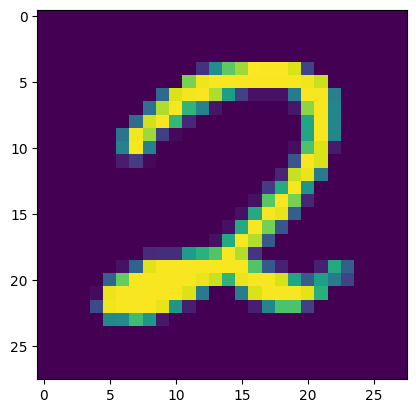

In [4]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
epochs=100, batch_size=128)
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1),
target_names=[str(x) for x in lb.classes_]))
# plot the training loss and accuracy
import random

for i in range(0,9):
  r = random.randint(0,100)

plt.imshow(xtest[r])

prediction = model.predict(testX)
print(f"The predicted value is {np.argmax(prediction[r])}")